Noisy signal LASSO reconstruction plot as a function of the regularization strength, Gaussian vs row-orthogonal matrices

In [1]:
import numpy as np
from VAMP_toolbox_clean import *
from sklearn import linear_model
from math import isnan

In [2]:
# Gaussian case, all i.i.d

n_exp = 10
reg_vec = np.linspace(0.01,0.1,n_exp)
E_vec = np.zeros(n_exp)
rho = 0.3
delta0 = 0.01
n,d = 200,100
    
reg = 0.01
avg = 10000

for i in range(n_exp):
    reg = reg_vec[i]
    print(reg,'regularization')
    E_exp = np.zeros(avg)
    for k in range(avg):
        F_train = np.random.normal(0,np.sqrt(1/n),(n,d))
        x0 = gauss_bernoulli(rho,d)
        w = np.random.normal(0,np.sqrt(delta0),n)
        y_train = F_train@x0+w
        clf = linear_model.ElasticNet(alpha=reg/n,l1_ratio=1,max_iter = 100000,tol = 0.00001)
        clf.fit(F_train,y_train)
        x_train = clf.coef_
        E_exp[k] = np.mean((x0-x_train)**2)
    
        #print(E_exp,np.mean(E_exp),np.var(E_exp))
        
    E_vec[i] = np.mean(E_exp)

0.01 regularization
0.020000000000000004 regularization
0.030000000000000006 regularization
0.04000000000000001 regularization
0.05000000000000001 regularization
0.06000000000000001 regularization
0.07 regularization
0.08 regularization
0.09000000000000001 regularization
0.1 regularization


In [3]:
# Asymptotics using SE equations/replica prediction

asp = 2
my_eps = 0
niter = 100
damp_se = 1

n_th = 250
reg_vec_th = np.linspace(0.01,0.1,n_th)
E_vec_th = np.zeros(n_th)
    
#reg = reg_vec_th[i]

for k in range(n_th):
    
    print(k)
    
    reg = reg_vec_th[k]
    alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_unif(asp,rho,delta0,reg,niter,damp_se,my_eps,0)
    
    V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
    A1 = alpha1_vec[-1]/V
    A2 = alpha2_vec[-1]/V
    tau1 = tau1_vec[-1]
    tau2 = tau2_vec[-1]
    E = 1/2*(E1_vec[-1]+E2_vec[-1])
    
    while isnan(E) == True:  # restart the iteration in case the fixed point was not found
        print('Restarting iteration')
        alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_unif(asp,rho,delta0,reg,niter,damp_se,my_eps,0)
        
        V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
        A1 = alpha1_vec[-1]/V
        A2 = alpha2_vec[-1]/V
        tau1 = tau1_vec[-1]
        tau2 = tau2_vec[-1]
        E = 1/2*(E1_vec[-1]+E2_vec[-1])
    
    
    
    E_vec_th[k] = E
    print(E)

0
0.01490315702260318
1
0.014767317278851808
2
0.01463415456621807
3
0.014503610955319816
4
0.014375629947602931
5
0.014250156441306701
6
0.014127136697973216
7
0.014006518309478685
8
0.013888250165610773
9
0.013772282422204435
10
0.013658566469849288
11
0.013547054903176602
12
0.013437701490734283
13
0.013330461145454692
14
0.013225289895719767
15
0.013122144857024816
16
0.013020984204243188
17
0.012921767144489664
18
0.012824453890582677
19
0.012729005635101001
20
0.012635381718110645
21
0.012543550849723945
22
0.012453474184395123
23
0.012365116586279125
24
0.01227844377793718
25
0.012193422318611117
26
0.012110021826058918
27
0.012028205969344482
28
0.011947945941163607
29
0.011869211432121819
30
0.011791972864793897
31
0.011716201812050502
32
0.011641869224833068
33
0.01156894598705546
34
0.011497409383169635
35
0.011427231156890639
36
0.011358385735446997
37
0.01129084815326323
38
0.011224594035958643
39
0.011159599584775429
40
0.011095841561426647
41
0.011033297273353778
42
0.01

/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:268: RuntimeWarning: invalid value encountered in sqrt
  alpha1 = damp_se*my_e*((1-rho)*special.erfc(reg/(gamma1*np.sqrt(2*tau1)))+rho*special.erfc(reg/(gamma1*np.sqrt(2*(1+tau1)))))+(1-damp_se)*alpha1
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:271: RuntimeWarning: invalid value encountered in sqrt
  E1_inter = (1-rho)*my_e**2*(erfc(reg/gamma1/np.sqrt(2*tau1))*((reg/gamma1)**2+tau1)-np.exp(-(reg/gamma1)**2/(2*tau1))*np.sqrt(2*tau1/np.pi)*reg/gamma1)
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:73: RuntimeWarning: invalid value encountered in sqrt
  res = 0.5*x**2*(erf((A-x)/(np.sqrt(2*tau1)))+erf((A+x)/(np.sqrt(2*tau1))))
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOIN

Restarting iteration
0.00864302102555383
121
0.008634359001178463
122
0.00862606261730026
123
0.00861812770558058
124
0.0086105501708483
125
0.008603325989560213
126
0.008596451208298914
127
0.008589921942306622
128
0.008583734374054382
129
0.008577884751845247
130
0.008572369388451276
131
0.008567184659782349
132
0.008562327003587292
133
0.008557792918184998
134
0.008553578961226134
135
0.008549681748483548
136
0.008546097952671205
137
0.008542824302290863
138
0.008539857580505381
139
Restarting iteration
0.008537194624038395
140
0.008534832322099504
141
0.008532767615334199
142
0.008530997494798182
143
0.008529519000954878
144
0.00852832922269648
145
0.008527425296386754
146
0.008526804404926064
147
0.008526463776837457
148
0.00852640068537342
149
0.008526612447642924
150
0.008527096423743462
151
0.00852785001598449
152
0.008528870667985812
153
0.008530155863937294
154
0.008531703127805013
155
0.008533510022568762
156
0.008535574149476715
157
0.008537893147316289
158
0.00854046469170

In [9]:
# Row-orthogonal setup, experiment

reg_vec = np.linspace(0.01,0.1,n_exp)
E_vec_ort = np.zeros(n_exp)
rho = 0.3
delta0 = 0.01
n,d = 200,100
asp = 2
    
reg = 0.01
avg = 10000

for i in range(n_exp):
    reg = reg_vec[i]
    print(reg,'regularization')
    for k in range(avg):
        #if (k-k//1000*1000)==0:
            #print(k/avg*100,'%')
        F_train,D = build_matrix(1,2,n,d,asp,0)
        x0 = gauss_bernoulli(rho,d)
        w = np.random.normal(0,np.sqrt(delta0),n)
        y_train = F_train@x0+w
        clf = linear_model.ElasticNet(alpha=reg/n,l1_ratio=1,max_iter = 100000,tol = 0.00001)
        clf.fit(F_train,y_train)
        x_train = clf.coef_
        E_exp[k] = np.mean((x0-x_train)**2)
    
        #print(E_exp,np.mean(E_exp),np.var(E_exp))
        
    E_vec_ort[i] = np.mean(E_exp)

0.01 regularization
0.020000000000000004 regularization
0.030000000000000006 regularization
0.04000000000000001 regularization
0.05000000000000001 regularization
0.06000000000000001 regularization
0.07 regularization
0.08 regularization
0.09000000000000001 regularization
0.1 regularization


In [15]:
# Row orthogonal theory using the SE asymptotics/replica prediction


asp = 2
my_eps = 0
niter = 100
damp_se = 1
a,b=1,2


reg_vec_th = np.linspace(0.01,0.1,n_th)
E_vec_ort_th = np.zeros(n_th)
    
#reg = reg_vec_th[i]

for k in range(n_th):
    
    print(k)
    reg = reg_vec_th[k]
    alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_delta(asp,rho,delta0,reg,niter,damp_se,my_eps)
    
    V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
    A1 = alpha1_vec[-1]/V
    A2 = alpha2_vec[-1]/V
    tau1 = tau1_vec[-1]
    tau2 = tau2_vec[-1]
    E = 1/2*(E1_vec[-1]+E2_vec[-1])
    
    while isnan(E) == True:
        print('Restarting iteration')
        alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_delta(asp,rho,delta0,reg,niter,damp_se,my_eps)
        
        V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
        A1 = alpha1_vec[-1]/V
        A2 = alpha2_vec[-1]/V
        tau1 = tau1_vec[-1]
        tau2 = tau2_vec[-1]
        E = 1/2*(E1_vec[-1]+E2_vec[-1])
        
    E_vec_ort_th[k] = E    
    print(E)

0
0.008933307328407717
1
0.008898343403937036
2
0.008863624388596409
3
0.008829149713080128
4
0.008794918808286152
5
0.008760931105322754
6
0.008727186035515425
7
0.00869368303041353
8
0.008660421521797133
9
0.008627400941683717
10
0.008594620722334901
11
0.008562080296263208
12
0.008529779096238754
13
0.008497716555295975
14
0.00846589210674029
15
0.008434305184154809
16
0.008402955221407053
17
0.008371841652655535
18
0.008340963912356439
19
0.008310321435270347
20
0.008279913656468723
21
0.008249740011340618
22
0.008219799935599337
23
0.00819009286528888
24
0.008160618236790625
25
0.008131375486829876
26
0.00810236405248241
27
0.00807358337118104
28
0.0080450328807221
29
0.008016712019271979
30
0.00798862022537363
31
0.007960756937953067
32
0.007933121596325745
33
0.007905713640203137
34
0.00787853250969911
35
0.007851577645336342
36
0.00782484848805272
37
0.007798344479207797
38
Restarting iteration
0.007772065060589094
39
0.007746009674418498
40
0.007720177763358578
41
0.0076945687

/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:148: RuntimeWarning: divide by zero encountered in double_scalars
  eta1 = gamma1/alpha1
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:154: RuntimeWarning: invalid value encountered in double_scalars
  alpha2 = max(0,1-asp)+asp*scale(asp)*gamma2/(1+gamma2)
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:156: RuntimeWarning: invalid value encountered in double_scalars
  E2 = max(0,1-asp)*tau2+scale(asp)*asp*(delta0+tau2*gamma2**2)/(1+gamma2)**2


Restarting iteration
0.006140315104435193
212
0.006145218514300095
213
0.006150260270542517
214
0.006155439966848633
215
0.0061607571980435375
216
0.006166211560092185
217
0.00617180265010054
218
0.006177530066316729
219
0.006183393408131996
220
0.006189392276081776
221
0.006195526271846644
222
0.006201794998253232
223
0.0062081980592752165
224
0.006214735060034096
225
0.006221405606800165
226
0.00622820930699319
227
0.00623514576918331
228
0.006242214603091694
229
0.006249415419591332
230
0.006256747830707661
231
0.006264211449619214
232
0.006271805890658328
233
0.0062795307693116345
234
0.0062873857022206405
235
0.006295370307182279
236
0.006303484203149377
237
0.006311727010231118
238
0.006320098349693472
239
0.006328597843959635
240
0.006337225116610305
241
0.00634597979238409
242
0.006354861497177762
243
0.006363869858046593
244
0.006373004503204554
245
0.0063822650620245155
246
0.006391651165038431
247
0.006401162443937513
248
0.006410798531572314
249
0.006420559061952847


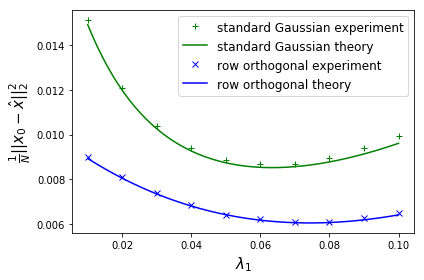

In [17]:
plt.plot(reg_vec,E_vec,'+g',label = 'standard Gaussian experiment')
plt.plot(reg_vec_th,E_vec_th,'g', label = 'standard Gaussian theory')
plt.legend()
#plt.savefig('kabashima', dpi=500, quality = 95)
plt.plot(reg_vec,E_vec_ort,'xb',label = 'row orthogonal experiment')
plt.plot(reg_vec_th,E_vec_ort_th,'b', label = 'row orthogonal theory')
plt.legend(fontsize = 12)
#plt.title('Gaussian sanity check d=100')
plt.xlabel('$\lambda_{1}$')
plt.ylabel(r'$\frac{1}{N}||x_{0}-\hat{x}||_{2}^{2}$')
plt.rc('axes', labelsize = 15)
plt.tight_layout()
plt.savefig('kabashima', dpi=500, quality = 95)